Greyscale ℓ2-TV Denoising
=========================

This example demonstrates the use of class [tvl2.TVL2Deconv](http://sporco.rtfd.org/en/latest/modules/sporco.admm.tvl2.html#sporco.admm.tvl2.TVL2Deconv) for removing Gaussian white noise from a greyscale image using Total Variation regularization with an ℓ2 data fidelity term (ℓ2-TV denoising). (This class is primarily intended for deconvolution problems, but can be applied to denoising problems by choosing an impulse filter as the blurring kernel.)

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import tvl2
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672], gray=True)

Construct test image corrupted Gaussian white noise with a 0.05 standard deviation.

In [3]:
np.random.seed(12345)
imgn = img + np.random.normal(0.0, 0.05, img.shape)

Set regularization parameter and options for ℓ2-TV deconvolution solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 0.04
opt = tvl2.TVL2Deconv.Options({'Verbose': True, 'MaxMainIter': 200,
                               'gEvalY': False})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = tvl2.TVL2Deconv(np.ones((1,1)), imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------


   0  7.70e+02  8.17e+01  1.72e+04  6.82e-01  4.34e-01  1.80e-01
   1  6.20e+02  2.30e+02  9.75e+03  2.99e-01  1.44e-01  1.80e-01
   2  5.99e+02  2.52e+02  8.66e+03  1.71e-01  9.59e-02  2.59e-01


   3  5.90e+02  2.66e+02  8.10e+03  1.07e-01  6.85e-02  3.46e-01
   4  5.85e+02  2.68e+02  7.93e+03  7.23e-02  5.39e-02  4.33e-01


   5  5.82e+02  2.69e+02  7.82e+03  5.11e-02  4.33e-02  5.01e-01
   6  5.80e+02  2.68e+02  7.78e+03  3.77e-02  3.18e-02  5.01e-01
   7  5.78e+02  2.68e+02  7.75e+03  2.89e-02  2.27e-02  5.01e-01


   8  5.77e+02  2.68e+02  7.73e+03  2.26e-02  1.86e-02  5.66e-01
   9  5.77e+02  2.68e+02  7.72e+03  1.80e-02  1.65e-02  6.24e-01
  10  5.76e+02  2.68e+02  7.71e+03  1.46e-02  1.38e-02  6.24e-01


  11  5.76e+02  2.68e+02  7.70e+03  1.20e-02  1.10e-02  6.24e-01
  12  5.76e+02  2.68e+02  7.70e+03  1.00e-02  8.88e-03  6.24e-01
  13  5.75e+02  2.67e+02  7.70e+03  8.52e-03  7.26e-03  6.24e-01


  14  5.75e+02  2.67e+02  7.70e+03  7.32e-03  6.05e-03  6.24e-01
  15  5.75e+02  2.67e+02  7.69e+03  6.35e-03  5.48e-03  6.86e-01
  16  5.75e+02  2.67e+02  7.69e+03  5.56e-03  4.98e-03  6.86e-01


  17  5.75e+02  2.67e+02  7.69e+03  4.91e-03  4.32e-03  6.86e-01
  18  5.75e+02  2.67e+02  7.69e+03  4.37e-03  3.75e-03  6.86e-01
  19  5.75e+02  2.67e+02  7.69e+03  3.92e-03  3.22e-03  6.86e-01


  20  5.75e+02  2.67e+02  7.69e+03  3.54e-03  3.01e-03  7.57e-01
  21  5.75e+02  2.67e+02  7.69e+03  3.21e-03  2.85e-03  7.57e-01
  22  5.75e+02  2.67e+02  7.69e+03  2.92e-03  2.57e-03  7.57e-01


  23  5.75e+02  2.67e+02  7.69e+03  2.67e-03  2.29e-03  7.57e-01
  24  5.75e+02  2.67e+02  7.69e+03  2.46e-03  2.04e-03  7.57e-01
  25  5.75e+02  2.67e+02  7.69e+03  2.26e-03  1.97e-03  8.32e-01


  26  5.74e+02  2.67e+02  7.69e+03  2.09e-03  1.91e-03  8.32e-01
  27  5.74e+02  2.67e+02  7.69e+03  1.94e-03  1.71e-03  8.32e-01
  28  5.74e+02  2.67e+02  7.69e+03  1.80e-03  1.54e-03  8.32e-01


  29  5.74e+02  2.67e+02  7.69e+03  1.68e-03  1.44e-03  8.32e-01
  30  5.74e+02  2.67e+02  7.69e+03  1.57e-03  1.31e-03  8.32e-01
  31  5.74e+02  2.67e+02  7.69e+03  1.46e-03  1.28e-03  9.11e-01


  32  5.74e+02  2.67e+02  7.68e+03  1.37e-03  1.24e-03  9.11e-01
  33  5.74e+02  2.67e+02  7.68e+03  1.29e-03  1.13e-03  9.11e-01
  34  5.74e+02  2.67e+02  7.68e+03  1.21e-03  1.06e-03  9.11e-01


  35  5.74e+02  2.67e+02  7.68e+03  1.14e-03  9.87e-04  9.11e-01
  36  5.74e+02  2.67e+02  7.68e+03  1.08e-03  9.18e-04  9.11e-01
  37  5.74e+02  2.67e+02  7.68e+03  1.02e-03  8.45e-04  9.11e-01


  38  5.74e+02  2.67e+02  7.68e+03  9.62e-04  8.25e-04  1.00e+00
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL2Deconv solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL2Deconv solve time:  6.24 s
Noisy image PSNR:    25.04 dB
Denoised image PSNR: 32.45 dB


Display reference, corrupted, and denoised images.

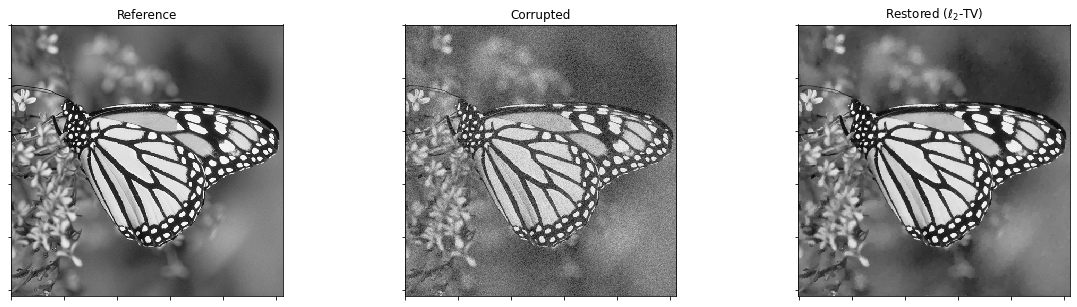

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_2$-TV)', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

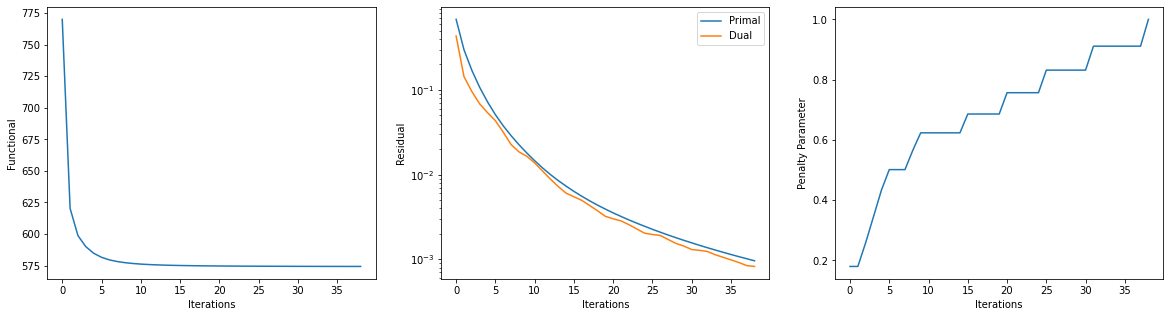

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()